<a href="https://colab.research.google.com/github/zyberg2091/Quora-Question-Pair-analysis/blob/master/Quora_Question_Pairs_17_08_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input,Dense,Dropout,LSTM,Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd

2.3.0


In [ ]:
import csv

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/train.csv.zip",compression='zip').sample(frac=1)

In [ ]:
len(df)

404290

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
213723,213723,150068,319125,"What is the meaning of the word ""soundacious""?",What is the meaning of word 'vensunda'?,0
56359,56359,99207,99208,Which startups are hiring in mumbai?,Which startups are hiring in Pune?,0
98879,98879,164249,16107,Why is the logo of Java a cup of coffee?,What is the reason behind the Java logo being ...,1
130167,130167,208951,208952,What could cause a world war ?,What caused World War I?,0
186183,186183,54835,42174,What do people fall in love with?,Why do people fall in love?,0


In [ ]:
# res=pd.read_csv("/content/drive/My Drive/sample_submission.csv")
# test_df=pd.read_csv("/content/drive/My Drive/test.csv")
# res.head()

In [ ]:
# test_df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 213723 to 5482
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df[(df['question1']==np.nan) | (df['question2']==np.nan)]

,id,qid1,qid2,question1,question2,is_duplicate


In [ ]:
assert df.loc[201841,'question2'] == np.nan #Note : error because np.nan!=np.nan

AssertionError: ignored

In [ ]:
df[df.isna().any(axis=1)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [ ]:
#dropping manually as dropna was not working but now it works
# df=df.drop([201841,105780,363362])
df=df.dropna()

In [ ]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
len(df)

404287

In [ ]:
#wordcloud

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

stopwords=set(STOPWORDS)

def word_cloud(data):
   wordcloud = WordCloud(width = 800, height = 600, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(str(data))

   plt.figure(figsize=(15,15))
   plt.axis('off')
   plt.suptitle('repeated words',fontsize = 20)
   plt.imshow(wordcloud)
   plt.show()

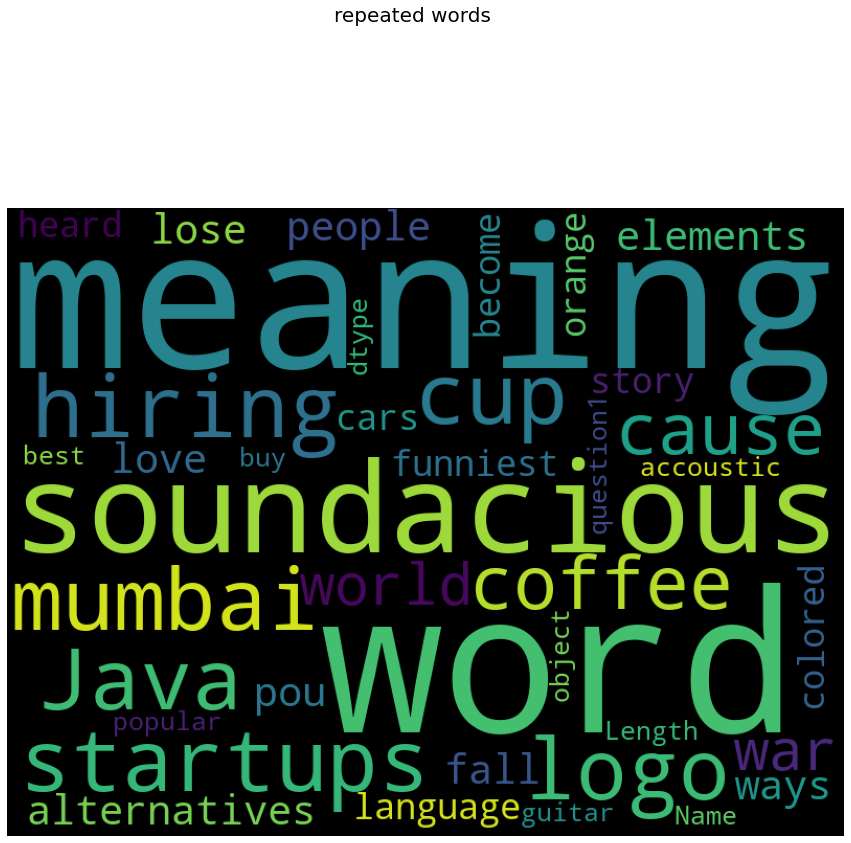

In [ ]:
word_cloud(df['question1'])

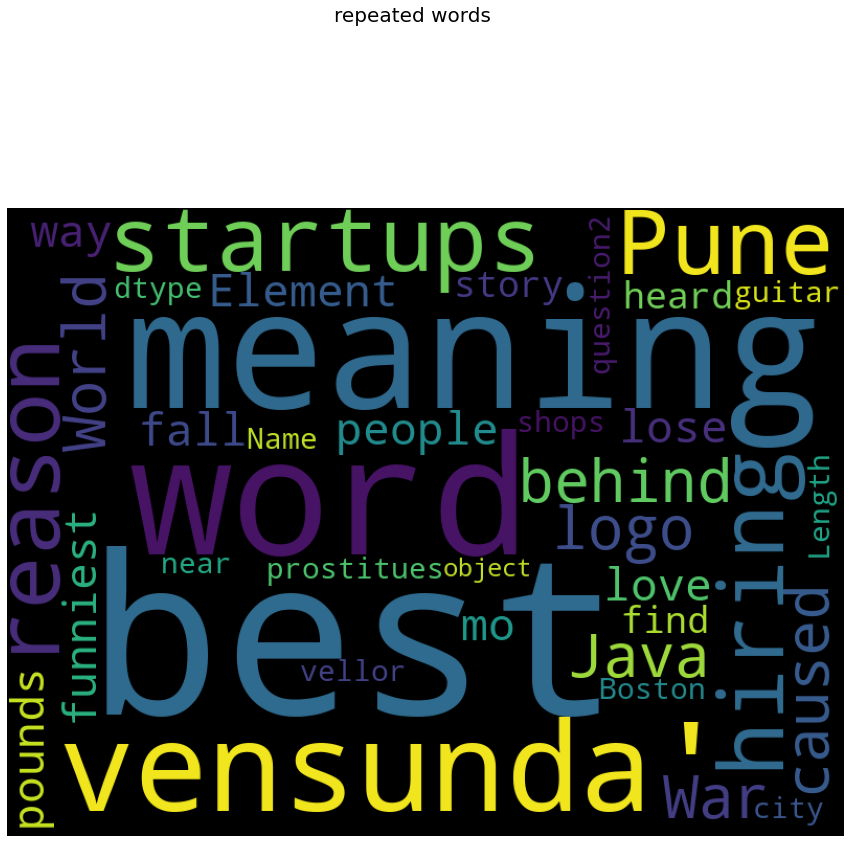

In [ ]:
word_cloud(df['question2'])

In [ ]:
a,b=len(df['question1'].unique()),len(df['question2'].unique())

<BarContainer object of 2 artists>

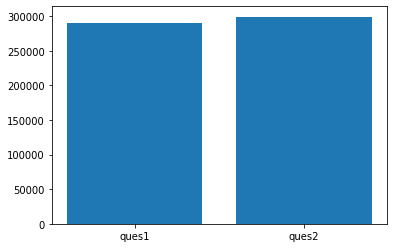

In [ ]:
plt.bar(x=['ques1','ques2'],height=[a,b])

In [ ]:
df['questions']=df['question1']+df['question2']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 213723 to 5482
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
 6   questions     404287 non-null  object
dtypes: int64(4), object(3)
memory usage: 24.7+ MB


In [ ]:
len(df['questions'])

404287

In [ ]:
df=df.drop(columns=['questions'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 213723 to 5482
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404287 non-null  int64 
 1   qid1          404287 non-null  int64 
 2   qid2          404287 non-null  int64 
 3   question1     404287 non-null  object
 4   question2     404287 non-null  object
 5   is_duplicate  404287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 21.6+ MB


In [ ]:
from functools import reduce 
len(reduce(np.intersect1d, [df['question1'], df['question2']])) #exactly the same questions in the two columns when compared one column to the another column

52269

In [ ]:
len(df[df['is_duplicate']==1]) # question PAIRS makes same sense

149263

In [ ]:
#tokenization and data processing

tokenizer=Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(df['question1'])
sequence=tokenizer.texts_to_sequences(df['question1'])

In [ ]:
length=max([len(i) for i in sequence])
length

127

In [ ]:
sequences=pad_sequences(sequence,maxlen=127,padding='post')

In [ ]:
tokenizer.fit_on_texts(df['question2'])
sequence_1=tokenizer.texts_to_sequences(df['question2'])
sequences_1=pad_sequences(sequence_1,maxlen=127,padding='post')

In [ ]:
vocab_len=len(tokenizer.word_index)

In [ ]:
y_train=df['is_duplicate'].values

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,num_classes=2)


In [ ]:
y_train.shape

(404287, 2)

In [ ]:
data=int(0.005*len(sequences))
data

2021

In [ ]:
x_train_data_1,x_train_data_2=sequences[:data],sequences_1[:data]
x_test_data_1,x_test_data_2=sequences[data:data+1000],sequences_1[data:data+1000]
y_train_data=y_train[:data]
y_test_data=y_train[data:data+1000]

In [ ]:
x_test_data_1.shape,x_test_data_2.shape,y_test_data.shape

((1000, 127), (1000, 127), (1000, 2))

In [ ]:
x_train_data_1.shape,x_train_data_2.shape,y_train_data.shape

((2021, 127), (2021, 127), (2021, 2))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding,TimeDistributed,Flatten,BatchNormalization
from tensorflow.keras.layers import concatenate

In [ ]:
#model(siamese network)

embedding_layer=Embedding(vocab_len+1,100,input_length=x_train_data_1.shape[-1])
lstm=LSTM(512,dropout=0.3)

s1=Input(shape=(x_train_data_1.shape[-1]))
embed=embedding_layer(s1)
x1=lstm(embed)

s2=Input(shape=(x_train_data_1.shape[-1]))
embed_1=embedding_layer(s2)
y1=lstm(embed_1)

#eucledian distance is not used here.i tried with simple DNN
com=concatenate([x1,y1])                    
com=Dropout(0.2)(com)
com=BatchNormalization()(com)
com=Dense(256,activation='relu')(com)
com=Dropout(0.2)(com)
pred=Dense(2,activation='softmax')(com)        

model=Model([s1,s2],pred)

model.compile(optimizer=Adam(0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 127)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 127)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 127, 100)     9559700     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 512)          1255424     embedding[0][0]       

In [ ]:
batch_size=100

In [ ]:
r=model.fit([x_train_data_1,x_train_data_2],y_train_data,steps_per_epoch=int(len(sequences[:data])//batch_size),validation_data=([x_test_data_1,x_test_data_2],y_test_data),epochs=5,verbose=1)

Epoch 1/5
20/20 [==============================] - 4s 196ms/step - loss: 0.7440 - accuracy: 0.4122 - val_loss: 0.6830 - val_accuracy: 0.6320
Epoch 2/5
20/20 [==============================] - 3s 162ms/step - loss: 0.7005 - accuracy: 0.4973 - val_loss: 0.6742 - val_accuracy: 0.6320
Epoch 3/5
20/20 [==============================] - 4s 180ms/step - loss: 0.6789 - accuracy: 0.5799 - val_loss: 0.6670 - val_accuracy: 0.6320
Epoch 4/5
20/20 [==============================] - 3s 163ms/step - loss: 0.6695 - accuracy: 0.6086 - val_loss: 0.6624 - val_accuracy: 0.6320
Epoch 5/5
20/20 [==============================] - 3s 163ms/step - loss: 0.6657 - accuracy: 0.6274 - val_loss: 0.6600 - val_accuracy: 0.6320


In [ ]:
model.save('my_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
test_df.head()

NameError: ignored

In [ ]:
test_df.info()

In [ ]:
test_df.isna().any(axis=0)

In [ ]:
test_df.isnull().sum()

In [ ]:
test_df[test_df.isna().any(axis=1)==True]

In [ ]:
test_df=test_df.drop([379205,817520,943911,1046690,1270024,1461432,2345796,2345796,2679111],axis=0)

In [ ]:
test_df[test_df.isna().any(axis=1)==True]

In [ ]:
test_df=test_df.drop([2487703],axis=0)

In [ ]:
tokenizer.fit_on_texts(test_df['question1'])
test_sequence=tokenizer.texts_to_sequences(test_df['question1'])
test_sequences=pad_sequences(test_sequence,maxlen=127,padding='post')
tokenizer.fit_on_texts(test_df['question2'])
test_sequence_1=tokenizer.texts_to_sequences(test_df['question2'])
test_sequences_1=pad_sequences(test_sequence_1,maxlen=127,padding='post')

In [ ]:
result=model.predict([x_test_data_1,x_test_data_2])

In [ ]:
type(result)

In [ ]:
result[:1]